In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/netflix_titles.csv"

df_netflix=pd.read_csv(url)

In [3]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


FASE 1: Limpieza de Texto (Text Mining básico)
1) Inspecciona: info() y isnull(). Verás que director, cast y country tienen muchos huecos.

* Acción: Rellena los nulos de director y cast con "No Data".

* Acción: Elimina las filas donde date_added o rating sean nulos (son muy pocas y no vale la pena imputar).

2) Fechas: La columna date_added es texto (ej: "September 25, 2021").

* Reto: Conviértela a formato fecha real con pd.to_datetime(). Recuerda usar .str.strip() antes por si hay espacios invisibles.

In [5]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
df_netflix['director']=df_netflix['director'].fillna('No Data')
df_netflix['cast']=df_netflix['cast'].fillna('No Data')
df_netflix.dropna(subset=['date_added','rating'],inplace=True)
df_netflix.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         471
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [ ]:
#primero lo paso a str y strip y luego a datetime
df_netflix['date_added']=df_netflix['date_added'].str.strip()
df_netflix['date_added']=pd.to_datetime(df_netflix['date_added'])
df_netflix['date_added']

0      2019-09-09
1      2016-09-09
2      2018-09-08
3      2018-09-08
4      2017-09-08
          ...    
6218   2019-04-10
6219   2019-04-01
6220   2016-04-01
6221   2016-04-01
6222   2014-04-01
Name: date_added, Length: 6214, dtype: datetime64[ns]

FASE 2: La Tendencia Temporal (Time Series)

1) Ingeniería de Características: Crea una columna nueva year_added extrayendo el año de tu columna de fecha (dt.year).

2) Gráfico: Haz un gráfico de línea (lineplot) o barras que muestre cuántos títulos se añadieron por año.

* Pregunta: ¿En qué año Netflix "explotó" y empezó a añadir contenido masivamente?


In [16]:
df_netflix['year_added']=df_netflix['date_added'].dt.year
df_netflix['year_added']

0       2019
1       2016
2       2018
3       2018
4       2017
        ... 
6218    2019
6219    2019
6220    2016
6221    2016
6222    2014
Name: year_added, Length: 6214, dtype: int32

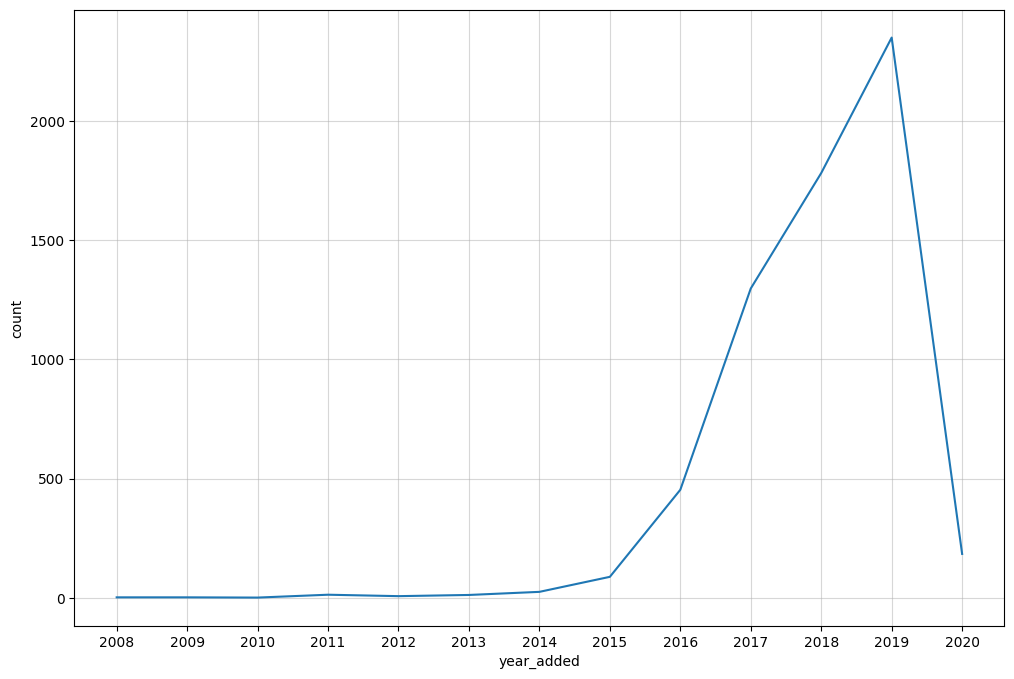

In [55]:
x=df_netflix['year_added'].value_counts().sort_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=x)
plt.xticks(np.arange(2008,2021,1))
plt.grid(visible=True, alpha=0.5)
plt.show()

FASE 3: El Gran Debate (Movies vs TV Shows)

1) Comparación: ¿Qué hay más, películas o series? (value_counts de la columna type).

2) Duración (El Boss Final de la limpieza):

* La columna duration es un desastre: tiene cosas como "90 min" y "2 Seasons" mezcladas.

* Tu Misión: Filtra el DataFrame para quedarte SOLO con Movies.

* Crea una copia (df_movies = df[...] .copy()).

* Limpia la columna duration en ese nuevo df: quita el texto " min" y conviértelo a número entero.

* Gráfico: Haz un Histograma (histplot) de la duración de las películas. ¿Cuánto dura la película promedio en Netflix?

In [ ]:
df_netflix['type'].value_counts()

type
Movie      4257
TV Show    1957
Name: count, dtype: int64

In [59]:
#para evitar el warning de copy dataframe, uso .copy()
df_movies=df_netflix[df_netflix['type']=='Movie'].copy()
df_movies=df_movies.reset_index(drop=True)
df_movies['duration']=df_movies['duration'].str.replace(' min', '', regex=False)
df_movies['duration']=df_movies['duration'].astype(int)
df_movies['duration']

0        90
1        94
2        99
3       110
4        60
       ... 
4252    106
4253     70
4254    102
4255     88
4256    109
Name: duration, Length: 4257, dtype: int64

Text(0, 0.5, 'Cantidad de Peliculas')

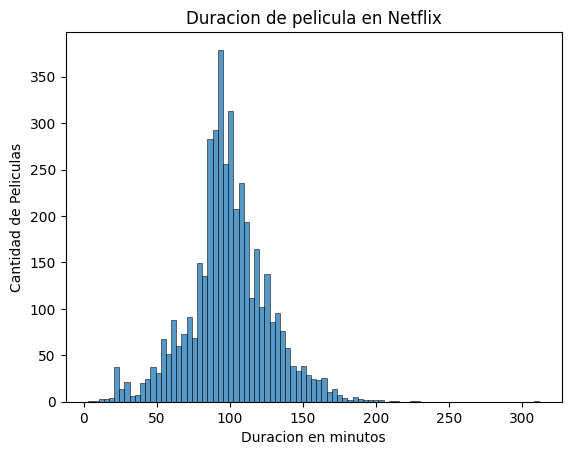

In [61]:
sns.histplot(x=df_movies['duration'])
plt.title('Duracion de pelicula en Netflix')
plt.xlabel('Duracion en minutos')
plt.ylabel('Cantidad de Peliculas')

In [63]:
df_movies['duration'].describe()

count    4257.000000
mean       99.156448
std        28.056618
min         3.000000
25%        86.000000
50%        98.000000
75%       115.000000
max       312.000000
Name: duration, dtype: float64